In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scripts.benchmark_functions import *
from scripts.utils import preprocess_costs_accs, aggregate_randoms
import matplotlib.pyplot as plt
import seaborn as sns

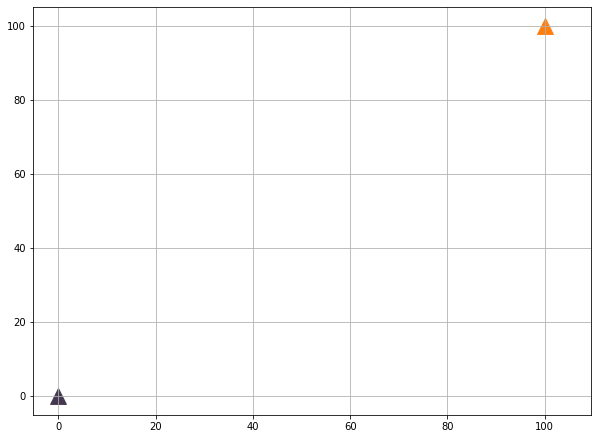

In [28]:
fig, ax = plt.subplots(figsize=(10,7.5))

costs_final, accs_final, acc_std_errors = load_costs_accs_from_file('full_dataset.npz')

costs_with_random, accs_with_random = aggregate_randoms(costs_final, accs_final)
costs_plot, accs_plot, acc_std_errors_plot = preprocess_costs_accs(costs_with_random, accs_with_random, acc_std_errors)

for k in accs_plot.keys():
    if k.startswith('naive'):
        marker = '^'
        markersize = 250
        color = '#443850' if k == 'naive_false' else '#FF7F0E'
        label = k
        
    elif k.startswith('scod'):
        continue
        marker = 'o'
        markersize = 80
        fl = int(k.rsplit('_',1)[-1])
        color = sns.color_palette("flare", n_colors=20)[fl]
        label = 'scod '+ str(int((fl/20)*100))+'%'

        ax.errorbar(accs_plot[k], costs_plot[k], xerr=[acc_std_errors_plot[k]], color=color)

    elif k.startswith('diverse'):
        continue
        marker = '*'
        markersize =120
        fl = int(k.rsplit('_',1)[-1])
        color = sns.color_palette("crest", n_colors=20)[fl]
        label = 'diverse '+ str(int((fl/20)*100))+'%'

        ax.errorbar(accs_plot[k], costs_plot[k], xerr=[acc_std_errors_plot[k]], yerr=[acc_std_errors[k+'_y']], color=color)
    elif k.startswith('agg_rand'):
        continue
        marker = 's'
        markersize =80
        fl = int(k.rsplit('_',1)[-1])
        color = sns.dark_palette("yellow", reverse=True, n_colors=25)[fl]
        label = 'random  '+ str(int((fl/20)*100))+'%'

        ax.errorbar(accs_plot[k], costs_plot[k], xerr=[acc_std_errors_plot[k]], color=color)
    else:
        markersize = 30
        marker = 'o'
        color = 'g'
        label = 'k'
    ax.scatter(accs_plot[k], costs_plot[k], markersize, label = label, marker=marker, color=color)
ax.grid(True)
ax.set_xlim([-5.215558804783606, 109.52673490045572])
ax.set_ylim([-5.0, 105.0])

# ax.set_ylabel("Labeling cost, %", fontsize=18)
# ax.set_xlabel("Avg improvement in model performance, %", fontsize=18)
# ax.legend(bbox_to_anchor=(1.01, 1), ncol=3, fontsize=15)

# plt.savefig('benchmark_high.pdf',bbox_inches='tight')
# plt.savefig('naive.pdf',bbox_inches='tight')


# ax.legend(bbox_to_anchor=(1.05, 1), ncol=3)
# plt.savefig('costvsperf.png', dpi='figure')


In [29]:
# # pdftoppm -png -r 1200 benchmark_high.pdf benchmark_high
! pdftoppm -png -r 1200 'naive.pdf' '1-naive'
! pdftoppm -png -r 1200 'with_random.pdf' '2-with_random'
! pdftoppm -png -r 1200 'with_scod.pdf' '3-with_scod'
! pdftoppm -png -r 1200 'with_diverse.pdf' '4-with_diverse'


## Categorical results

In [5]:
%pprint

Pretty printing has been turned OFF


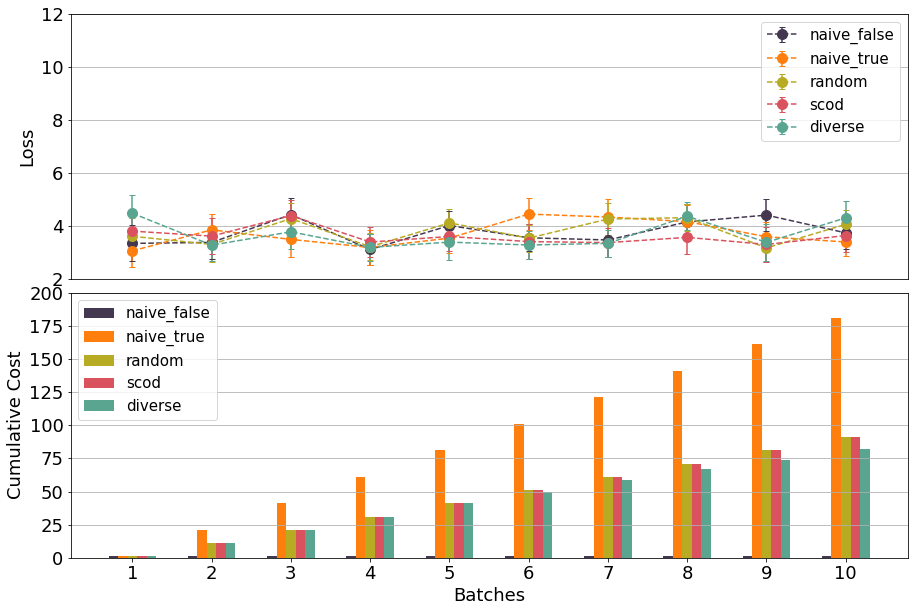

In [6]:
fname = 'space_only_naive_false_categorical.npz'
naive_f_loss_means, naive_f_loss_stddev, naive_f_cost_totals = load_categorical_loss_from_file(fname)

fname = 'space_only_naive_true_categorical.npz'
naive_t_loss_means, naive_t_loss_stddev, naive_t_cost_totals = load_categorical_loss_from_file(fname)

fname = 'space_only_rand_categorical.npz'
rand_loss_means, rand_loss_stddev, rand_cost_totals = load_categorical_loss_from_file(fname)

fname = 'space_only_scod_categorical.npz'
scod_loss_means, scod_loss_stddev, scod_cost_totals = load_categorical_loss_from_file(fname)

fname = 'space_only_diverse_categorical.npz'
diverse_loss_means, diverse_loss_stddev, diverse_cost_totals = load_categorical_loss_from_file(fname)

num_batches = 10
loss_means = [naive_f_loss_means, naive_t_loss_means, rand_loss_means, scod_loss_means, diverse_loss_means]
loss_stdev = [naive_f_loss_stddev, naive_t_loss_stddev, rand_loss_stddev, scod_loss_stddev, diverse_loss_stddev]
cost_totals = [naive_f_cost_totals, naive_t_cost_totals, rand_cost_totals, scod_cost_totals, diverse_cost_totals]

i = plot_timeseries_loss(num_batches, loss_means, loss_stdev, cost_totals, minimal=False, legend_external=False)

# plt.savefig('space_high.pdf',bbox_inches='tight')

# plt.savefig('temp_leg_1.pdf',bbox_inches='tight')

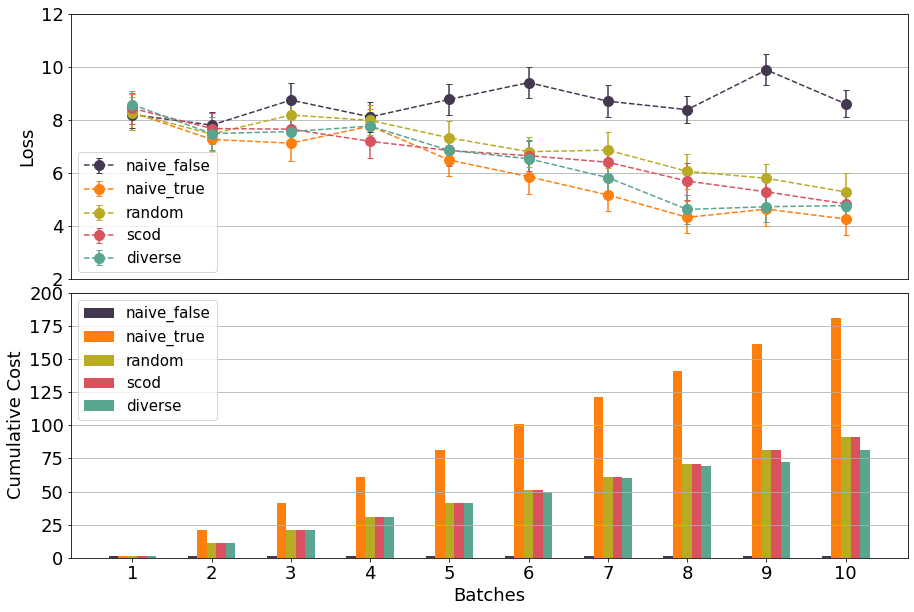

In [7]:
## EARTH

fname = 'earth_only_naive_false_categorical.npz'
naive_f_loss_means, naive_f_loss_stddev, naive_f_cost_totals = load_categorical_loss_from_file(fname)

fname = 'earth_only_naive_true_categorical.npz'
naive_t_loss_means, naive_t_loss_stddev, naive_t_cost_totals = load_categorical_loss_from_file(fname)

fname = 'earth_only_rand_categorical.npz'
rand_loss_means, rand_loss_stddev, rand_cost_totals = load_categorical_loss_from_file(fname)

fname = 'earth_only_scod_categorical.npz'
scod_loss_means, scod_loss_stddev, scod_cost_totals = load_categorical_loss_from_file(fname)

fname = 'earth_only_diverse_categorical.npz'
diverse_loss_means, diverse_loss_stddev, diverse_cost_totals = load_categorical_loss_from_file(fname)

num_batches = 10
loss_means = [naive_f_loss_means, naive_t_loss_means, rand_loss_means, scod_loss_means, diverse_loss_means]
loss_stdev = [naive_f_loss_stddev, naive_t_loss_stddev, rand_loss_stddev, scod_loss_stddev, diverse_loss_stddev]
cost_totals = [naive_f_cost_totals, naive_t_cost_totals, rand_cost_totals, scod_cost_totals, diverse_cost_totals]

i = plot_timeseries_loss(num_batches, loss_means, loss_stdev, cost_totals, minimal=False)

# plt.savefig('earth_high.pdf',bbox_inches='tight')


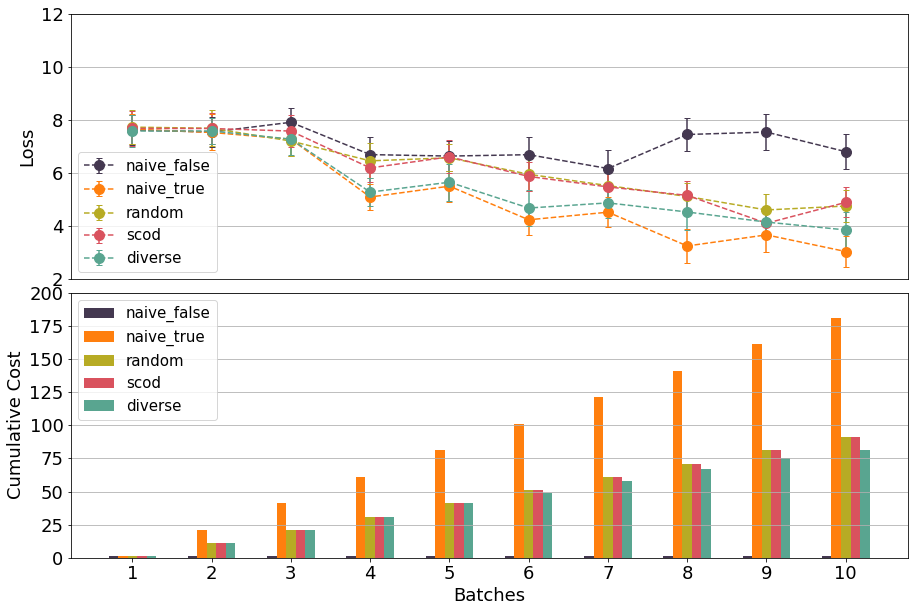

In [8]:
## LENS FLARE
fname = 'lens_flare_only_naive_false_categorical.npz'
naive_f_loss_means, naive_f_loss_stddev, naive_f_cost_totals = load_categorical_loss_from_file(fname)


fname = 'lens_flare_only_naive_true_categorical.npz'
naive_t_loss_means, naive_t_loss_stddev, naive_t_cost_totals = load_categorical_loss_from_file(fname)

fname = 'lens_flare_only_rand_categorical.npz'
rand_loss_means, rand_loss_stddev, rand_cost_totals = load_categorical_loss_from_file(fname)

fname = 'lens_flare_only_scod_categorical.npz'
scod_loss_means, scod_loss_stddev, scod_cost_totals = load_categorical_loss_from_file(fname)

fname = 'lens_flare_only_diverse_categorical.npz'
diverse_loss_means, diverse_loss_stddev, diverse_cost_totals = load_categorical_loss_from_file(fname)

num_batches = 10
loss_means = [naive_f_loss_means, naive_t_loss_means, rand_loss_means, scod_loss_means, diverse_loss_means]
loss_stdev = [naive_f_loss_stddev, naive_t_loss_stddev, rand_loss_stddev, scod_loss_stddev, diverse_loss_stddev]
cost_totals = [naive_f_cost_totals, naive_t_cost_totals, rand_cost_totals, scod_cost_totals, diverse_cost_totals]

i = plot_timeseries_loss(num_batches, loss_means, loss_stdev, cost_totals, minimal=False)
# plt.savefig('lens_flare_high.pdf',bbox_inches='tight')


In [9]:
# !pdftoppm -png -r 1200 space_high.pdf space
# !pdftoppm -png -r 1200 earth_high.pdf earth
# !pdftoppm -png -r 1200 lens_flare_high.pdf lens_flare
